In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

# Data Preparation

In [2]:
# import account excel file
account = pd.read_excel('Account.xlsx')

# import customer excel file
customer = pd.read_excel('Customer - Latest.xlsx')

In [3]:
# displays the first few rows of the datasets
# account
print(account.head())
print('\n')
# customer
print(customer.head())

   POLICY_NUMBER  PLAN_CODE  CLIENT_CODE  SUM_ASSURED  MODAL_PREMIUM  \
0          36461        166            2      25000.0           1763   
1           4842        114           21      15000.0           1561   
2          10473         24           39     250000.0            420   
3           9874        105           40      12500.0           1355   
4           2279        115           41      25000.0           1518   

  ISSUE_DATE TYPE POLICY_STATUS SURRENDER_DATE  PAYMENT_MODE  
0 2020-06-24    E      IN-FORCE            NaT             1  
1 2020-03-18    A      IN-FORCE            NaT            12  
2 2020-06-09    A      IN-FORCE            NaT             1  
3 2020-06-04    A      IN-FORCE            NaT            12  
4 2020-02-29    A      IN-FORCE            NaT            12  


   CLIENT_CODE AGE MARITAL_STATUS GENDER  INCOME  POSTCODE LASTUPDATE
0           21   E              M      F  120000     76300 2020-12-26
1           39   E              D      F   7200

# EDA

In [4]:
# metadata for account, customer

print(account.info())
print('\n')
print(customer.info())

## for account
# POLICY_NUMBER, PLAN_CODE, CLIENT_CODE, SUM_ASSURED, MODAL_PREMIUM, PAYMENT_MODE are numerical type
# ISSUE_DATE, SURRENDER_DATE are datetime type
# TYPE, POLICY_STATUS are string type
# 4017 entries

## for customer
# CLIENT_CODE, INCOME, POSTCODE are numerical type
# AGE, MARTIAL_STATUS, GENDER are string type
# LASTUPDATE are datetime type
# 4013 entries


## prelim. observations
# Between these two datasets, there is only 1 column that are common which is the CLIENT_CODE (potential keys) to connect 2 datasets
# 'AGE' column under the customer dataset is a string type for some reason

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   POLICY_NUMBER   4017 non-null   int64         
 1   PLAN_CODE       4017 non-null   int64         
 2   CLIENT_CODE     4017 non-null   int64         
 3   SUM_ASSURED     4004 non-null   float64       
 4   MODAL_PREMIUM   4017 non-null   int64         
 5   ISSUE_DATE      4017 non-null   datetime64[ns]
 6   TYPE            4017 non-null   object        
 7   POLICY_STATUS   4017 non-null   object        
 8   SURRENDER_DATE  33 non-null     datetime64[ns]
 9   PAYMENT_MODE    4017 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 314.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          

In [5]:
# summary statistics by describing the dataset
# for account
print(account.describe())
      
print('\n')

# for customer
print(customer.describe())

## prelim. observations

## for account
# For the SUM_ASSURED
# the avg is RM 391,385
# the median is RM 125,000
# the max is RM 87,668,450
# right - skewed distribution avg > median

# For the MODAL_PREMIUM
# the avg is RM 1,592
# the median is RM 1,596
# the max is RM 2,998
# approximately normal distribution

# For the PAYMENT_MODE
# the avg is 6.5
# the median is 6
# the max is 12
# approximately normal distribution

## for customer
# For the INCOME
# the avg is RM 105,899
# the median is RM 60,000
# the max is  RM 500,000
# right - skewed distribution avg > median

       POLICY_NUMBER    PLAN_CODE   CLIENT_CODE   SUM_ASSURED  MODAL_PREMIUM  \
count    4017.000000  4017.000000   4017.000000  4.004000e+03    4017.000000   
mean    19778.249440   107.263630  16918.975604  3.913859e+05    1592.545183   
std     11475.464835    57.248332   9915.556984  2.101303e+06     810.903380   
min        14.000000     0.000000      2.000000  3.750000e+02     200.000000   
25%      9932.000000    66.000000   8255.000000  5.000000e+04     879.000000   
50%     19708.000000   132.000000  16750.000000  1.250000e+05    1596.000000   
75%     29549.000000   154.000000  25516.000000  3.375000e+05    2286.000000   
max     39728.000000   170.000000  33119.000000  8.766845e+07    2998.000000   

       PAYMENT_MODE  
count   4017.000000  
mean       6.516555  
std        5.423250  
min        0.000000  
25%        1.000000  
50%        6.000000  
75%       12.000000  
max       12.000000  


        CLIENT_CODE         INCOME      POSTCODE
count   4013.000000    4013.00

## Detect missing values

In [6]:
# Null or missing values
# for account
account_missingval = account.isnull().sum()

print(account_missingval)
print('\n')

# for customer
customer_missingval = customer.isnull().sum()

print(customer_missingval)

## prelim. observations

## For account
# For SUM_ASSURED has 13 missing values
# For SURRENDER_DATE has significant number of missing values (3,984). This is expected as most policies are still in forced till now

## For customer
# For MARTIAL_STATUS has 167 missing values
# Further analysis on the data for MARITAL_STATUS is required

POLICY_NUMBER        0
PLAN_CODE            0
CLIENT_CODE          0
SUM_ASSURED         13
MODAL_PREMIUM        0
ISSUE_DATE           0
TYPE                 0
POLICY_STATUS        0
SURRENDER_DATE    3984
PAYMENT_MODE         0
dtype: int64


CLIENT_CODE         0
AGE                 0
MARITAL_STATUS    167
GENDER              0
INCOME              0
POSTCODE            0
LASTUPDATE          0
dtype: int64


In [7]:
customer.loc[10,:]

CLIENT_CODE                        98
AGE                                 C
MARITAL_STATUS                    NaN
GENDER                              M
INCOME                          48000
POSTCODE                        42000
LASTUPDATE        2021-04-17 00:00:00
Name: 10, dtype: object

In [8]:
# Analyzing missing counts in MARITAL Status

customer.groupby(['AGE', 'MARITAL_STATUS'], dropna = False).count()

# Quick search shows that Age A group has disproportionate Marital Status
# Imputing null data with the already existing attribute 'S'

CLIENT_CODE  GENDER  INCOME  POSTCODE  LASTUPDATE
AGE MARITAL_STATUS                                                   
A   S                        20      20      20        20          20
    NaN                     155     155     155       155         155
B   D                        11      11      11        11          11
    M                       266     266     266       266         266
    S                      1027    1027    1027      1027        1027
    NaN                       5       5       5         5           5
C   D                        25      25      25        25          25
    M                       781     781     781       781         781
    R                         1       1       1         1           1
    S                       299     299     299       299         299
    W                         9       9       9         9           9
    NaN                       3       3       3         3           3
D   D                        30      30      30        30          30
    M                       764     764     764       764         764
    R                         4       4       4         4           4
    S                       127     127     127       127         127
    W                        12      12      12        12          12
    NaN                       3       3       3         3           3
E   D                        14      14      14        14          14
    M                       395     395     395       395         395
    R                         4       4       4         4           4
    S                        48      48      48        48          48
    W                         9       9       9         9           9
    NaN                       1       1       1         1           1

## Data Cleansing

In [9]:
# Imputing null values with corresponding method

# for SUM_ASSURED, median imputation since the data is right-skewed
account['SUM_ASSURED'] = account['SUM_ASSURED'].fillna(account['SUM_ASSURED'].median())

# for MARTIAL status, impute the missing data based on the results above with 'S'
customer['MARITAL_STATUS'] = customer['MARITAL_STATUS'].fillna('S')

# Re-printing to confirm the null checks on each table
print(account.info())
print('\n')
print(customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   POLICY_NUMBER   4017 non-null   int64         
 1   PLAN_CODE       4017 non-null   int64         
 2   CLIENT_CODE     4017 non-null   int64         
 3   SUM_ASSURED     4017 non-null   float64       
 4   MODAL_PREMIUM   4017 non-null   int64         
 5   ISSUE_DATE      4017 non-null   datetime64[ns]
 6   TYPE            4017 non-null   object        
 7   POLICY_STATUS   4017 non-null   object        
 8   SURRENDER_DATE  33 non-null     datetime64[ns]
 9   PAYMENT_MODE    4017 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 314.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          

In [10]:
# Standardizing datetime data types to date only
# To ensure the precision is only up to yyyy-mm-dd (where time isn't required, based on the analysis)

account['ISSUE_DATE'] = pd.to_datetime(account['ISSUE_DATE']).dt.strftime('%Y-%m-%d')
account['SURRENDER_DATE'] = pd.to_datetime(account['SURRENDER_DATE']).dt.strftime('%Y-%m-%d')

customer['LASTUPDATE'] = pd.to_datetime(customer['LASTUPDATE']).dt.strftime('%Y-%m-%d')

## Data Analysis and Data Visualization

### In account dataset

1568734252.0750003


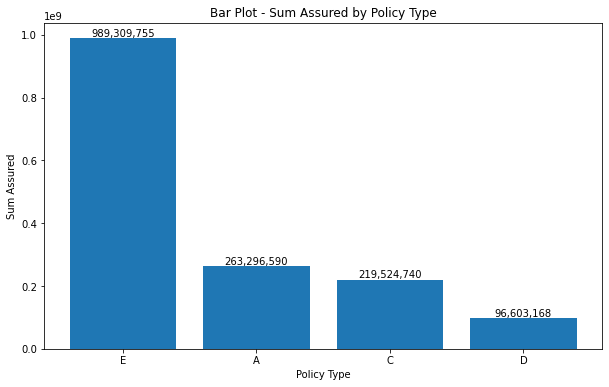

In [11]:
# Total Sum Insured
print(account['SUM_ASSURED'].sum())

# Configure plot size
fig = plt.figure(figsize = (10,6))

# Select the data for the plot
acc_ins = account[['TYPE', 'SUM_ASSURED']]

# Group the 'TYPE' and total sum the 'SUM_ASSURED'
acc_ins = acc_ins.groupby('TYPE')['SUM_ASSURED'].sum().reset_index()

# Sort the grouped data in desceding order
acc_ins = acc_ins.sort_values('SUM_ASSURED', ascending = False)

# Bar Plot
plt.bar(acc_ins['TYPE'], acc_ins['SUM_ASSURED'])

# Customize the plot
plt.title('Bar Plot - Sum Assured by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Sum Assured')

# Put labels to each bar

for i, j in enumerate(acc_ins['SUM_ASSURED']):
    plt.text(i, j, f'{j:,.0f}', ha = 'center', va = 'bottom')
    
# Display
plt.show()

## prelim. observations
# About RM 1.5 bil of Sum ASsured
# Type E has the highest amount of Sum Assured (RM 989 mil) in total
# The differences between E and the rest of types of policies varied by the factor ranging from x4 to x10

6397254


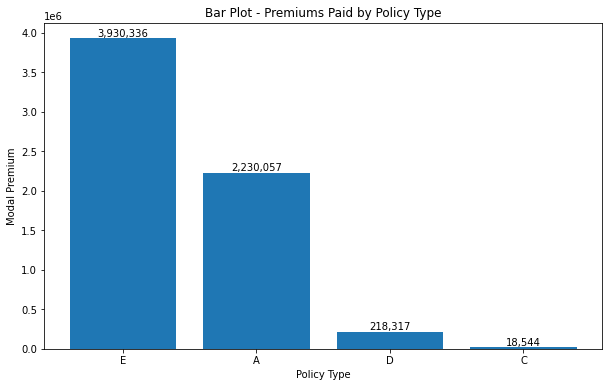

In [12]:
# Chargeable Premiums per insurance product (charge per insurance product)

print(account['MODAL_PREMIUM'].sum())

# Configure plot size
fig = plt.figure(figsize = (10,6))

# Select the data for the plot
acc_modal = account[['TYPE', 'MODAL_PREMIUM']]

# Group the 'TYPE' and total sum the 'MODAL_PREMIUM'
acc_modal = acc_modal.groupby('TYPE')['MODAL_PREMIUM'].sum().reset_index()

# Sort the grouped data in desceding order
acc_modal = acc_modal.sort_values('MODAL_PREMIUM', ascending = False)

# Bar Plot
plt.bar(acc_modal['TYPE'], acc_modal['MODAL_PREMIUM'])

# Customize the plot
plt.title('Bar Plot - Premiums Paid by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Modal Premium')

# Put labels to each bar

for i, j in enumerate(acc_modal['MODAL_PREMIUM']):
    plt.text(i, j, f'{j:,.0f}', ha = 'center', va = 'bottom')
    
# Display
plt.show()

## prelim. 
# RM 6.3 million 
# Yet again, Type E has the highest amount of contributions paid (RM 3.9 mil) in total
# The differences between E and the rest of types of policies skewed greatly, especially between D (x2) and between C (x218)

In [13]:
# Correlation between the Premiums Paid per policy and the Sum Insured

corr = account["MODAL_PREMIUM"].corr(account["SUM_ASSURED"])
print("The correlation between the Premiums and the Total Insured: ", f"{corr:.2%}")

# There is a negative correlation between the premiums paid per policy and the total insured to the client 

The correlation between the Premiums and the Total Insured:  -0.14%


41497417


C:\Users\qayyim\AppData\Local\Temp\ipykernel_23192\594258268.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_premtot['TOTAL_PREMIUM'] = acc_premtot['MODAL_PREMIUM']*acc_premtot['PAYMENT_MODE']


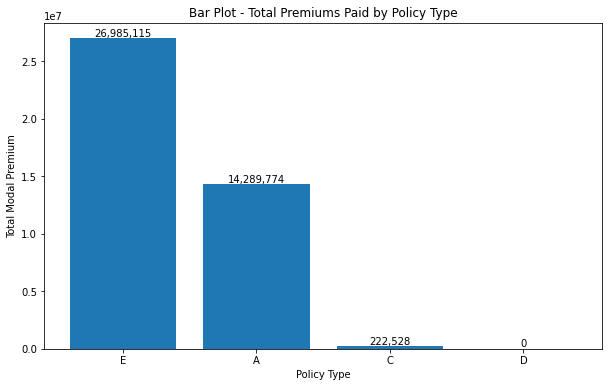

In [14]:
# Total Premiums Paid
total_premiums = (account['MODAL_PREMIUM']*account['PAYMENT_MODE'])
print(total_premiums.sum())

# Configure plot size
fig = plt.figure(figsize = (10,6))

# Select the data for the plot
acc_premtot = account[['TYPE', 'MODAL_PREMIUM', 'PAYMENT_MODE']]

# Create new column to contain the total premiums paid
acc_premtot['TOTAL_PREMIUM'] = acc_premtot['MODAL_PREMIUM']*acc_premtot['PAYMENT_MODE']

# Group the 'TYPE' and total sum the 'MODAL_PREMIUM'
acc_premtot = acc_premtot.groupby('TYPE')['TOTAL_PREMIUM'].sum().reset_index()

# Sort the grouped data in desceding order
acc_premtot = acc_premtot.sort_values('TOTAL_PREMIUM', ascending = False)

# Bar Plot
plt.bar(acc_premtot['TYPE'], acc_premtot['TOTAL_PREMIUM'])

# Customize the plot
plt.title('Bar Plot - Total Premiums Paid by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Total Modal Premium')

# Put labels to each bar

for i, j in enumerate(acc_premtot['TOTAL_PREMIUM']):
    plt.text(i, j, f'{j:,.0f}', ha = 'center', va = 'bottom')
    
# Display
plt.show()

## prelim. observations
# Yet again, Type E has the highest amount of contributions paid, cumulatively (RM 26.9 mil) if extrapolating the numbers
# The differences between E and the rest of types of policies skewed greatly, especially group C (x118)
# Interestinly, Type D doesn't have total contributions since all of the them have the frequency payment is 0

In [15]:
# Finding which Insurance type has payment mode with frequency of 0

account[account['PAYMENT_MODE'] == 0].groupby('TYPE')['PAYMENT_MODE'].count().sort_values()

# As expected, Type D does not have any frequency payment
# This may have to do with the way how the product design specifically for certain clients (specialized policies)

TYPE
A      2
E     13
D    140
Name: PAYMENT_MODE, dtype: int64

In [16]:
# Exploring the number of clients (distinct) for each group
# How many clients (distinct) have subscriptions?

account.groupby('TYPE').POLICY_NUMBER.nunique()

# Observed that product E and product A has more policies subscribed
# Product C may have been for high-value or high net-worth clients
# Product D, interestingly, shows that all of their clients have 0 payment frequency
## This could mean that D has been designed in this way...

TYPE
A    1398
C       9
D     140
E    2470
Name: POLICY_NUMBER, dtype: int64

In [17]:
# Correlation between the Premiums Paid cumulatively and the Sum Insured

corr = acc_premtot["TOTAL_PREMIUM"].corr(account["SUM_ASSURED"])
print("The correlation between the Premiums and the Total Insured: ", f"{corr:.2%}")

# There is a negative correlation between the premiums paid cumulatively and the total insured to the client 

The correlation between the Premiums and the Total Insured:  -54.04%


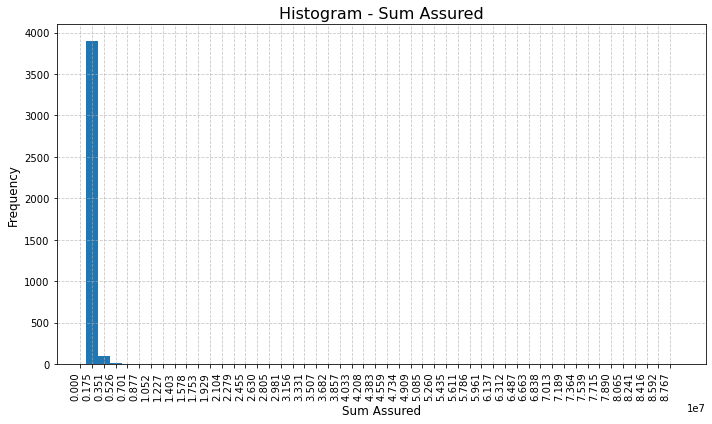

In [28]:
# Histogram for SUM_ASSURED
acc_ins = account["SUM_ASSURED"]

# Configure plot size
fig , ax = plt.subplots(figsize = (10,6))

# Define bins size
n_bins = 50

# Histogram
plot, bins, align = ax.hist(acc_ins, bins = n_bins, align = 'right')

# Calculate the maximum value and the interval
max_value = acc_ins.max() # or use data.max() if you want to use the actual maximum of your data
interval = max_value / n_bins

# Create bins
bins = np.arange(0, max_value + interval, interval)

# Set the x-ticks to be at the start of each bin
ax.set_xticks(bins)

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Customize the plot
ax.set_title('Histogram - Sum Assured', fontsize=16)
ax.set_xlabel('Sum Assured', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()


plt.show()

## prelim. observations
# The Accout data have shown that the Income data is a right-skewed
# Based on the data, most of the clients have the sum assured to be a total of below or equal to RM 125k
# However, due to small portion of the clients whose Sum Assured are higher, which causes the mean to be higher at RM 391k

In [19]:
# Calculate skewness and kurtosis of the col SUM_ASSURED
print(skew(account["SUM_ASSURED"], axis = 0, bias = True))
print(kurtosis(account["SUM_ASSURED"], axis = 0, bias = True))

## prelim. observations
# The skewness is high, therefore it confirms that there are more weight to the left tail, signifying majority of the clients are assured at this left tail of the distribution
# THe kurtosis is also high, therefore it confirms that there are outliers in the dataset


35.34890697010317
1404.2937579392024


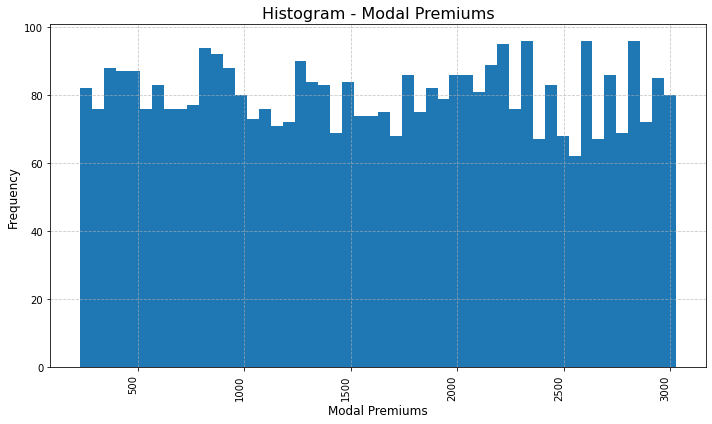

In [29]:
# Histogram for MODAL_PREMIUMS
acc_mod = account["MODAL_PREMIUM"]

# Configure plot size
fig , ax = plt.subplots(figsize = (10,6))

# Define bins size
n_bins = 50

# Histogram
plot, bins, align = ax.hist(acc_mod, bins = n_bins, align = 'right')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Customize the plot
ax.set_title('Histogram - Modal Premiums', fontsize=16)
ax.set_xlabel('Modal Premiums', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()


plt.show()

## prelim. observations
# The shape of the distribution is observed to be almost uniform
# This means that clients here paid premiums to the company using standardized pricing model
# But this means there are "imbalance" or "disparity" between premiums and total assured
# Which could suggests that some clients have speciliazed or tailored plans
# Or it could also suggests that the clients are charged similarly for some products (probably Product E and Product A)

In [30]:
# Calculate skewness and kurtosis of the col MODAL_PREMIUM
print(skew(account["MODAL_PREMIUM"], axis = 0, bias = True))
print(kurtosis(account["MODAL_PREMIUM"], axis = 0, bias = True))

## prelim. observations
# The skewness is high, therefore it confirms that there are more weight to the left tail, signifying majority of the clients are assured at this left tail of the distribution
# THe kurtosis is also high but leaning towards flatter top, therefore it confirms that there are outliers in the dataset


0.00410462432051801
-1.210775623126591


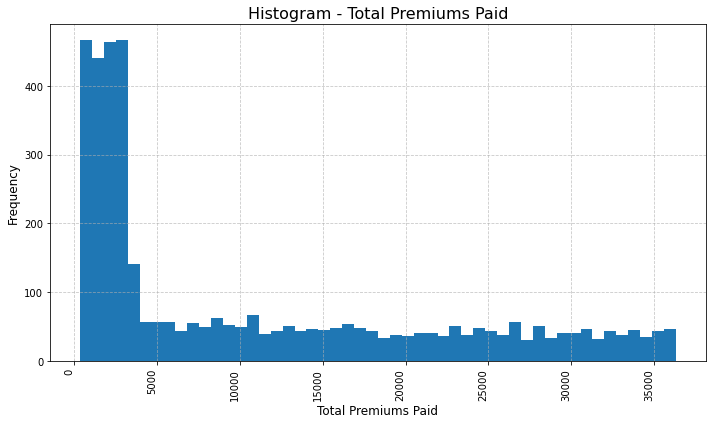

In [32]:
# Histogram for MODAL_PREMIUMS cumulatively
acc_mod = account["MODAL_PREMIUM"] * account["PAYMENT_MODE"]

# Configure plot size
fig , ax = plt.subplots(figsize = (10,6))

# Define bins size
n_bins = 50

# Histogram
plot, bins, align = ax.hist(acc_mod, bins = n_bins, align = 'right')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Customize the plot
ax.set_title('Histogram - Total Premiums Paid', fontsize=16)
ax.set_xlabel('Total Premiums Paid', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()


plt.show()

## prelim. observations
# The shape of the distribution is observed to highly right skewed
# This means not all clients paid with the same amount of frequencies
# This could have an effect on the potential premiums paid out to the company

In [23]:
# Calculate skewness and kurtosis of the col MODAL_PREMIUM x PAYMENT_MODE
print(skew(account["MODAL_PREMIUM"] * account['PAYMENT_MODE'], axis = 0, bias = True))
print(kurtosis(account["MODAL_PREMIUM"] * account['PAYMENT_MODE'], axis = 0, bias = True))

## prelim. observations
# The skewness is high, therefore it confirms that there are more weight to the left tail, signifying majority of the clients are assured at this left tail of the distribution
# THe kurtosis is also high (compared to the premiums paid per policy), therefore it confirms that there are outliers in the dataset


0.8975776624421182
-0.6125097737742786


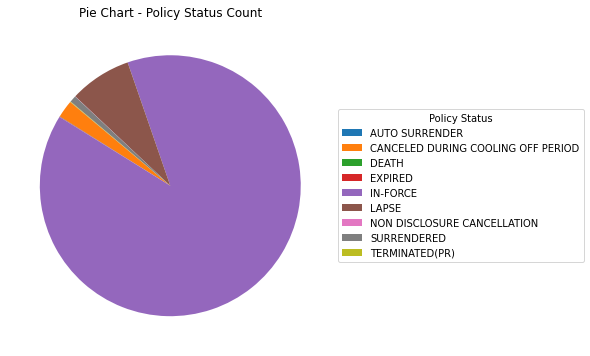

In [24]:
# Policy Status Proportion
acc_polstat = account.groupby('POLICY_STATUS')['POLICY_STATUS'].count()

# Sort the values from highest to lowest count
acc_polstat.sort_values(ascending = False)

# Extract the labels to list
status_labels = acc_polstat.index.tolist()

# Extract the values as array
status_values = acc_polstat.values

# Configure the subplots
fig, ax =plt.subplots(figsize = (10,6), facecolor = 'white')

# Plot the Pie Chart
wedges, autotexts = ax.pie(status_values, startangle = 140)

# Plot the legend
ax.legend(wedges, status_labels, title = 'Policy Status', loc = 'center left' , bbox_to_anchor = (1, 0, 0.5, 1))

# Customize the plot
plt.title('Pie Chart - Policy Status Count')

# Display the plot
plt.show()

In [25]:
# Table summary for % count for each policy status
# Calculate the total number of policies
total_policies = acc_polstat.sum()

# Create a new DataFrame with counts and percentages
df_policy_status = pd.DataFrame({
    'Count': acc_polstat,
    'Percent (%)': (acc_polstat / total_policies * 100).round(2)
})

df_policy_status.sort_values('Count', ascending = False)

## prelim. observations
# As expected, policies that are currently enforced compromises 89.15% of the dataset
# There are, of course, few outliers that contributed to anything except "IN-FORCE" such as policies expried, terminated, auto surrender, non disclosure and even death

,Count,Percent (%)
POLICY_STATUS,,
IN-FORCE,3581,89.15
LAPSE,309,7.69
CANCELED DURING COOLING OFF PERIOD,87,2.17
SURRENDERED,33,0.82
EXPIRED,2,0.05
TERMINATED(PR),2,0.05
AUTO SURRENDER,1,0.02
DEATH,1,0.02
NON DISCLOSURE CANCELLATION,1,0.02


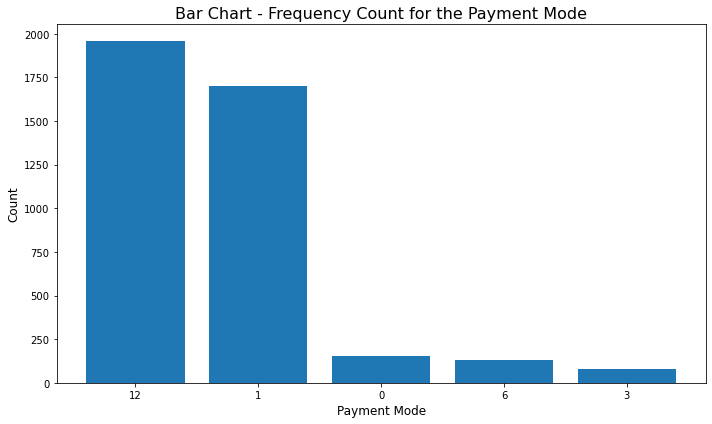

In [26]:
# Frequency for Payment Modes
acc_mode = account[["PAYMENT_MODE"]]

# Count the frequency by grouping the column
acc_count = acc_mode.groupby('PAYMENT_MODE')['PAYMENT_MODE'].count()

# Re-create new dataframe
acc_count = pd.DataFrame({"Payment Mode": acc_count.index, "Count":acc_count.values})

# Sort the values
acc_count = acc_count.sort_values('Count', ascending = False)

# Change dataframe to list
mode = acc_count['Payment Mode'].to_list()
count = acc_count['Count'].to_list()



# Configure plot size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
bars = ax.bar(range(len(mode)), count)

# Set x-axis ticks and labels
ax.set_xticks(range(len(mode)))
ax.set_xticklabels(mode)

# Customize the plot
ax.set_title('Bar Chart - Frequency Count for the Payment Mode', fontsize=16)
ax.set_xlabel('Payment Mode', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display
plt.show()

## prelim. observations
# It can observed that Payment 12 and 1 are the most frequent types of payment
# The extreme end of the groups were 0, 6 and 3 which are very miniscule compared to 12 and 1

### In Customer - Latest dataset

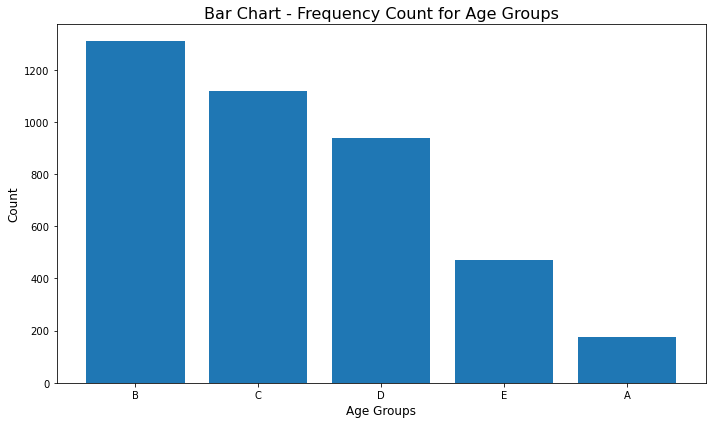

In [27]:
# Frequency for Age Groups
cust_age = customer[["AGE"]]

# Count the frequency by grouping the column
cust_age = cust_age.groupby('AGE')['AGE'].count()

# Re-create new dataframe
cust_age = pd.DataFrame({"Age": cust_age.index, "Count":cust_age.values})

# Sort the values
cust_age = cust_age.sort_values('Count', ascending = False)

# Change dataframe to list
mode = cust_age['Age'].to_list()
count = cust_age['Count'].to_list()

# Configure plot size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
bars = ax.bar(range(len(mode)), count)

# Set x-axis ticks and labels
ax.set_xticks(range(len(mode)))
ax.set_xticklabels(mode)

# Customize the plot
ax.set_title('Bar Chart - Frequency Count for Age Groups', fontsize=16)
ax.set_xlabel('Age Groups', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display
plt.show()

## prelim. observations
# It could be assumed that these categories have been designated with arbitrary labels
# B, C, D were one of the most frequency age groups count, followed by E
# A is considered as an outlier

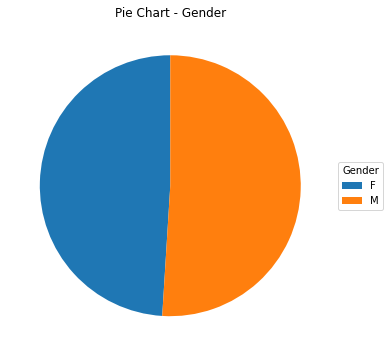

In [28]:
# Genders Proportion
cust_gender = customer.groupby('GENDER')['GENDER'].count()

# Sort the values from highest to lowest count
cust_gender.sort_values(ascending = False)

# Extract the labels to list
status_labels = cust_gender.index.tolist()

# Extract the values as array
status_values = cust_gender.values

# Configure the subplots
fig, ax =plt.subplots(figsize = (10,6), facecolor = 'white')

# Plot the Pie Chart
wedges, autotexts = ax.pie(status_values, startangle = 90)

# Plot the legend
ax.legend(wedges, status_labels, title = 'Gender', loc = 'center left' , bbox_to_anchor = (1, 0, 0.5, 1))

# Customize the plot
plt.title('Pie Chart - Gender')

# Display the plot
plt.show()

In [29]:
# Table summary for % count for each policy status
# Calculate the total number of policies
total = cust_gender.sum()

# Create a new DataFrame with counts and percentages
df_gender = pd.DataFrame({
    'Count': cust_gender,
    'Percent (%)': (cust_gender / total * 100).round(2)
})

df_gender.sort_values('Count', ascending = False)

## prelim. observations
# Majority of the clients were Male (51.4%) while the rest are Females (48.5%)


,Count,Percent (%)
GENDER,,
M,2046,50.98
F,1967,49.02


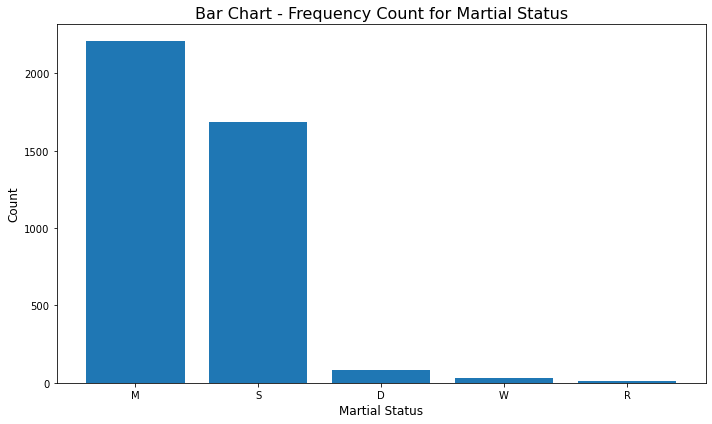

In [30]:
# Frequency for Marital Status
cust_stat = customer[["MARITAL_STATUS"]]

# Count the frequency by grouping the column
cust_stat = cust_stat.groupby('MARITAL_STATUS')['MARITAL_STATUS'].count()

# Re-create new dataframe
cust_stat = pd.DataFrame({"Marital Status": cust_stat.index, "Count":cust_stat.values})

# Sort the values
cust_stat = cust_stat.sort_values('Count', ascending = False)

# Change dataframe to list
mode = cust_stat['Marital Status'].to_list()
count = cust_stat['Count'].to_list()

# Configure plot size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar plot
bars = ax.bar(range(len(mode)), count)

# Set x-axis ticks and labels
ax.set_xticks(range(len(mode)))
ax.set_xticklabels(mode)

# Customize the plot
ax.set_title('Bar Chart - Frequency Count for Martial Status', fontsize=16)
ax.set_xlabel('Martial Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display
plt.show()

## prelim. observations
# M were the most prominent groups, followed by Singles
# D and W were on the 'lower' end
# R is the lowest amongst all

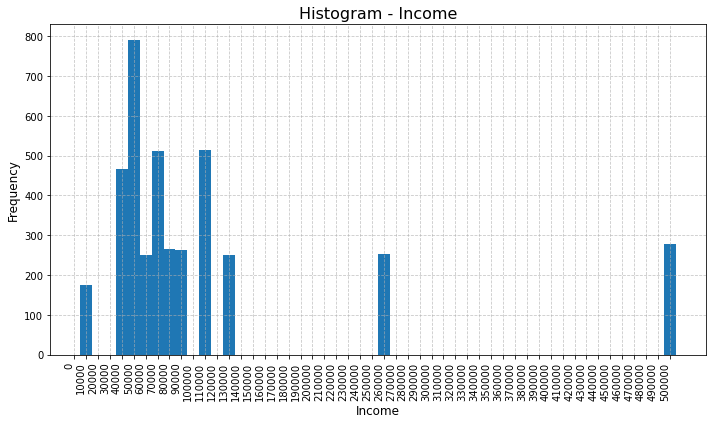

In [31]:
# Histogram for income group
cust_inc = customer["INCOME"]

# Configure plot size
fig , ax = plt.subplots(figsize = (10,6))

# Define bins size
n_bins = 50

# Histogram
plot, bins, align = ax.hist(cust_inc, bins = n_bins, align = 'right')

# Calculate the maximum value and the interval
max_value = cust_inc.max() # or use data.max() if you want to use the actual maximum of your data
interval = max_value / n_bins

# Create bins
bins = np.arange(0, max_value + interval, interval)

# Set the x-ticks to be at the start of each bin
ax.set_xticks(bins)

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Customize the plot
ax.set_title('Histogram - Income', fontsize=16)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels
plt.tight_layout()


plt.show()

## prelim. observations
# The Customer data have shown that the Income data is a right-skewed as pointed out earlier
# Based on the data too, most of the clients have the income of below or equal to RM 60,000
# However, small portion of  clients have incomes on the upper quartile, causing the mean RM 105,889 higher than the median

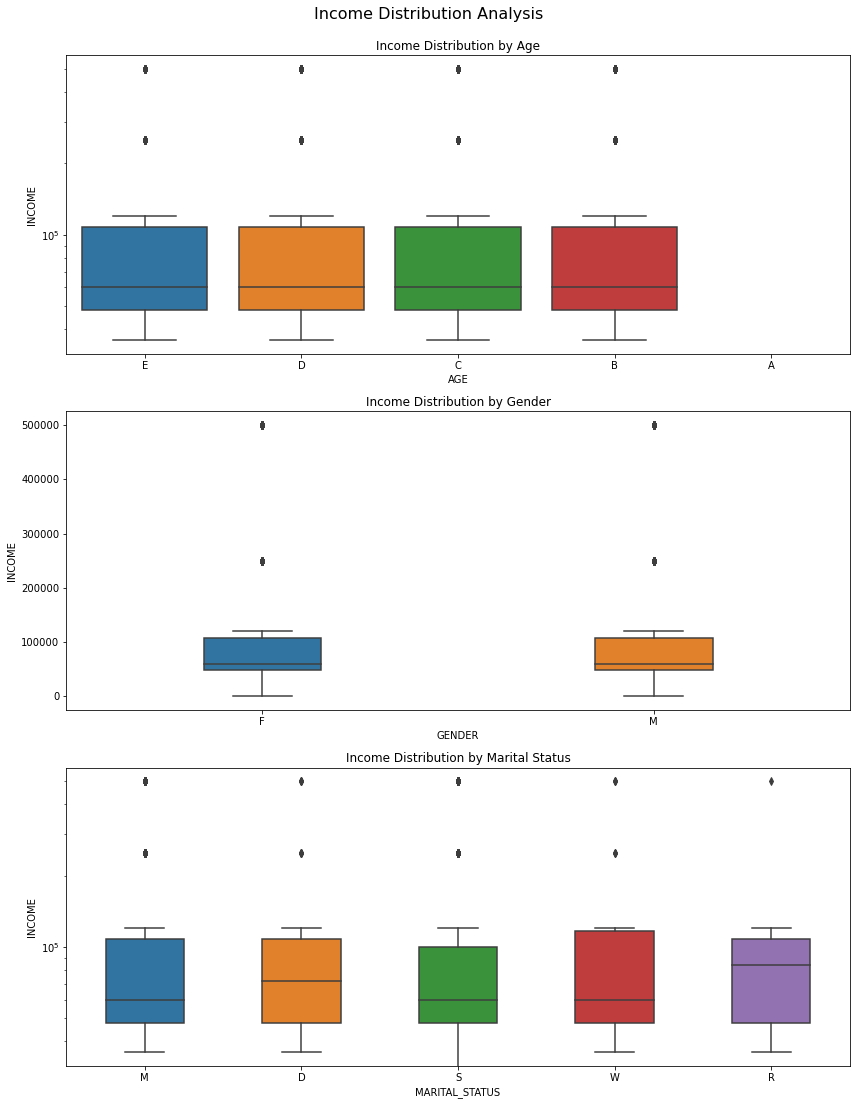

In [32]:
# Income Distribution by Age, Gender and Marital Status

# Create a figure with 3 subplots arranged horizontally
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: AGE vs INCOME
sns.boxplot(data=customer, x='AGE', y='INCOME', ax=ax1)
ax1.set_title('Income Distribution by Age')
ax1.set_yscale('log')

# Plot 2: GENDER vs INCOME
sns.boxplot(data=customer, x='GENDER', y='INCOME', ax=ax2, width = 0.3)
ax2.set_title('Income Distribution by Gender')

# Plot 3: MARITAL_STATUS vs INCOME
sns.boxplot(data=customer, x='MARITAL_STATUS', y='INCOME', ax=ax3, width = 0.5)
ax3.set_title('Income Distribution by Marital Status')
ax3.set_yscale('log')

# Adjust the layout and add a main title
plt.tight_layout()
fig.suptitle('Income Distribution Analysis', fontsize=16, y=1.02)

# Show the plot
plt.show()

## prelim. observations
## AGE profile
# The income distribution for each AGE group shows similar distribution, where the median is the same
# Age Group A weren't included in the income distribution, which confirms they are either children, or non working adolescent

## Gender
# Similar distribution
# Pie Chart also confirms the % weightage between the two Genders

# Marital Status
# The median < mean across all marital status group
# Which means there are subset of clients in each of these group earning higher, which causes the mean to be higher as well

In [33]:
customer.groupby(['MARITAL_STATUS'])['INCOME'].describe()

# Although the sampling populations are unequal, the standard deviations for each groups varies in the factor of 10^5
# The R status, which has the lowest count, have the highest median and the average Income compared the rest of the groups
# The S has minimum of 0, which is possible given that the Age Group A are mostly assgined in 'S'

,count,mean,std,min,25%,50%,75%,max
MARITAL_STATUS,,,,,,,,
D,80.0,105025.000000,104773.169698,36000.0,48000.0,72000.0,108000.0,500000.0
M,2206.0,108185.856754,117107.481687,36000.0,48000.0,60000.0,108000.0,500000.0
R,9.0,120000.000000,146082.168659,36000.0,48000.0,84000.0,108000.0,500000.0
S,1688.0,102550.947867,123898.584688,0.0,48000.0,60000.0,100000.0,500000.0
W,30.0,124266.666667,141489.352185,36000.0,48000.0,60000.0,117000.0,500000.0


## Export the dataset, to be insert the data into MSSQL

In [34]:
# account

print(account.info())
print('\n')
print(account.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   POLICY_NUMBER   4017 non-null   int64  
 1   PLAN_CODE       4017 non-null   int64  
 2   CLIENT_CODE     4017 non-null   int64  
 3   SUM_ASSURED     4017 non-null   float64
 4   MODAL_PREMIUM   4017 non-null   int64  
 5   ISSUE_DATE      4017 non-null   object 
 6   TYPE            4017 non-null   object 
 7   POLICY_STATUS   4017 non-null   object 
 8   SURRENDER_DATE  33 non-null     object 
 9   PAYMENT_MODE    4017 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 314.0+ KB
None


       POLICY_NUMBER    PLAN_CODE   CLIENT_CODE   SUM_ASSURED  MODAL_PREMIUM  \
count    4017.000000  4017.000000   4017.000000  4.017000e+03    4017.000000   
mean    19778.249440   107.263630  16918.975604  3.905238e+05    1592.545183   
std     11475.464835    57.248332   9915.5

In [35]:
# customer

print(customer.info())
print('\n')
print(customer.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CLIENT_CODE     4013 non-null   int64 
 1   AGE             4013 non-null   object
 2   MARITAL_STATUS  4013 non-null   object
 3   GENDER          4013 non-null   object
 4   INCOME          4013 non-null   int64 
 5   POSTCODE        4013 non-null   int64 
 6   LASTUPDATE      4013 non-null   object
dtypes: int64(3), object(4)
memory usage: 219.6+ KB
None


        CLIENT_CODE         INCOME      POSTCODE
count   4013.000000    4013.000000   4013.000000
mean   16911.176177  105899.327187  51016.468976
std     9907.156284  120025.702764  21407.830736
min       21.000000       0.000000  10470.000000
25%     8255.000000   48000.000000  41250.000000
50%    16709.000000   60000.000000  50450.000000
75%    25488.000000  108000.000000  75000.000000
max    33119.000000  500000.000000  81100.00000

In [36]:
# Rounding any floats to 2 decimal places
account['SUM_ASSURED'] = round(account['SUM_ASSURED'],2)

In [37]:
# export
account.to_csv('Account_cleaned.csv', index = False)
customer.to_csv('Customer_cleaned.csv', index = False)

## Additional

In [38]:
# Calculating new columns, Premiums Paid with Mode of Frequency included
account['TOTAL_PREMIUM'] = account['MODAL_PREMIUM']*account['PAYMENT_MODE']

# Describing the statistics
account.describe()

# Determine the median for TOTAL_PREMIUM is the best representative for the calculation

,POLICY_NUMBER,PLAN_CODE,CLIENT_CODE,SUM_ASSURED,MODAL_PREMIUM,PAYMENT_MODE,TOTAL_PREMIUM
count,4017.000000,4017.000000,4017.000000,4.017000e+03,4017.000000,4017.000000,4017.000000
mean,19778.249440,107.263630,16918.975604,3.905238e+05,1592.545183,6.516555,10330.449838
std,11475.464835,57.248332,9915.556984,2.097954e+06,810.903380,5.423250,11000.807187
min,14.000000,0.000000,2.000000,3.750000e+02,200.000000,0.000000,0.000000
25%,9932.000000,66.000000,8255.000000,5.000000e+04,879.000000,1.000000,1592.000000
50%,19708.000000,132.000000,16750.000000,1.250000e+05,1596.000000,6.000000,4116.000000
75%,29549.000000,154.000000,25516.000000,3.375000e+05,2286.000000,12.000000,18420.000000
max,39728.000000,170.000000,33119.000000,8.766845e+07,2998.000000,12.000000,35952.000000
